In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
import re

# Load datasets with specified encoding

merged_df = pd.read_csv('New_Merged.csv')

merged_df = merged_df.dropna()


# Create lag features
lags = [1, 2, 3]
parameters = ['pH (units)', 'Ammonia (mg/L)', 'Nitrate (mg/L)', 'Inorganic Phosphate (mg/L)', 'BOD (mg/l)', 'Dissolved Oxygen (mg/l)', 'Total coliforms (MPN/100ml)']

for parameter in parameters:
    for lag in lags:
        merged_df[f'{parameter}_lag_{lag}'] = merged_df[parameter].shift(lag)

# Drop rows with NaN values resulting from lag feature creation
merged_df.dropna(inplace=True)




# Select relevant columns for normalization
cols_to_normalize = parameters + ['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Pressure', 'Precip.']

# Normalize the selected columns
scaler = StandardScaler()
merged_df[cols_to_normalize] = scaler.fit_transform(merged_df[cols_to_normalize])

# Define and fit the SARIMA model for each parameter
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

models = {}
forecasts = {}

for parameter in parameters:
    model = SARIMAX(merged_df[parameter], order=sarima_order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=1)
    models[parameter] = model_fit
    forecasts[parameter] = forecast

# Print the forecasts
for parameter, forecast in forecasts.items():
    print(f"Forecast for {parameter}:")
    print(forecast)

merged_df.columns


E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored 

Forecast for pH (units):
655   -1.902259
dtype: float64
Forecast for Ammonia (mg/L):
655   -0.121987
dtype: float64
Forecast for Nitrate (mg/L):
655    0.870798
dtype: float64
Forecast for Inorganic Phosphate (mg/L):
655   -0.400862
dtype: float64
Forecast for BOD (mg/l):
655   -0.584849
dtype: float64
Forecast for Dissolved Oxygen (mg/l):
655   -0.125312
dtype: float64
Forecast for Total coliforms (MPN/100ml):
655    1.319919
dtype: float64


E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Index(['Monitoring Stations', 'Month', 'Year', 'pH (units)', 'Ammonia (mg/L)',
       'Nitrate (mg/L)', 'Inorganic Phosphate (mg/L)', 'BOD (mg/l)',
       'Dissolved Oxygen (mg/l)', 'Total coliforms (MPN/100ml)',
       'Phytoplankton (cells/ml)', 'Wind', 'Condition', 'Day', 'Time',
       'Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust',
       'Pressure', 'Precip.', 'Date', 'pH (units)_lag_1', 'pH (units)_lag_2',
       'pH (units)_lag_3', 'Ammonia (mg/L)_lag_1', 'Ammonia (mg/L)_lag_2',
       'Ammonia (mg/L)_lag_3', 'Nitrate (mg/L)_lag_1', 'Nitrate (mg/L)_lag_2',
       'Nitrate (mg/L)_lag_3', 'Inorganic Phosphate (mg/L)_lag_1',
       'Inorganic Phosphate (mg/L)_lag_2', 'Inorganic Phosphate (mg/L)_lag_3',
       'BOD (mg/l)_lag_1', 'BOD (mg/l)_lag_2', 'BOD (mg/l)_lag_3',
       'Dissolved Oxygen (mg/l)_lag_1', 'Dissolved Oxygen (mg/l)_lag_2',
       'Dissolved Oxygen (mg/l)_lag_3', 'Total coliforms (MPN/100ml)_lag_1',
       'Total coliforms (MPN/100ml)_lag_2',
   

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import warnings


#WARNINGS
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found. Using zeros as starting parameters.")
warnings.filterwarnings("ignore", message="A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.")
warnings.filterwarnings("ignore", message="No supported index is available. Prediction results will be given with an integer index beginning at `start`.")
warnings.filterwarnings("ignore", message="No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.")



# Load dataset
merged_df = pd.read_csv('updated_dataset_with_predictions.csv')

station_name = 'Stn. IV (Central Bay)'
merged_df = merged_df[merged_df['Monitoring Stations'] == station_name]

print(merged_df)
# Drop rows with missing values
merged_df.dropna(inplace=True)

# Ensure there's a Date column for time series forecasting
# Assuming 'Year' and 'Month' columns exist
merged_df['Date'] = pd.to_datetime(merged_df[['Year', 'Month']].assign(DAY=1))
merged_df.set_index('Date', inplace=True)

# Define SARIMA parameters
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Monthly data with yearly seasonality

# Initialize dictionaries for models and forecasts
models = {}
forecasts = {}

# List of parameters to model
parameters = ['pH (units)', 'Ammonia (mg/L)', 'Inorganic Phosphate (mg/L)', 'BOD (mg/l)', 'Total coliforms (MPN/100ml)']


# Fit SARIMA model and make forecasts
for parameter in parameters:
    try:
        model = SARIMAX(merged_df[parameter], order=sarima_order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)
        forecast = model_fit.forecast(steps=1)  # Forecast 12 months ahead
        models[parameter] = model_fit
        forecasts[parameter] = forecast.values[0]
    except Exception as e:
        print(f"An error occurred while fitting the model for {parameter}: {e}")

# Print the forecasts
for parameter, forecast in forecasts.items():
    print(f"Forecast for {parameter}:")
    print(forecast)

forecast_df = pd.DataFrame([forecasts])

print("Forecasted Values:")
print(forecast_df)


        Monitoring Stations  Month    Year  pH (units)  Ammonia (mg/L)  \
2     Stn. IV (Central Bay)    1.0  2013.0         NaN             NaN   
11    Stn. IV (Central Bay)    2.0  2013.0         NaN             NaN   
20    Stn. IV (Central Bay)    3.0  2013.0         NaN             NaN   
29    Stn. IV (Central Bay)    4.0  2013.0         NaN             NaN   
38    Stn. IV (Central Bay)    5.0  2013.0         NaN             NaN   
...                     ...    ...     ...         ...             ...   
1289  Stn. IV (Central Bay)    8.0  2023.0         8.2            0.01   
1304  Stn. IV (Central Bay)    9.0  2023.0         8.5            0.01   
1319  Stn. IV (Central Bay)   10.0  2023.0         8.6            0.01   
1334  Stn. IV (Central Bay)   11.0  2023.0         8.1            0.05   
1349  Stn. IV (Central Bay)   12.0  2023.0         8.2             NaN   

      Nitrate (mg/L)  Inorganic Phosphate (mg/L)  BOD (mg/l)  \
2                NaN                         Na

For each Monitoring Station

E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Va

   pH (units)  Ammonia (mg/L)  Nitrate (mg/L)  Inorganic Phosphate (mg/L)  \
0    7.776065        0.081322        0.441746                    0.222505   

   BOD (mg/l)  Dissolved Oxygen (mg/l)  Total coliforms (MPN/100ml)  \
0    4.348805                 7.763746                   251.897467   

  Forecast Date  
0    2023-01-01  


E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\John Wilson\AppData\Local\Temp\ipykernel_19480\3807174215.py:63: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=station_data.index[-1] + pd.DateOffset(months=1), periods=1, freq='M')  # Adjust to 1 period


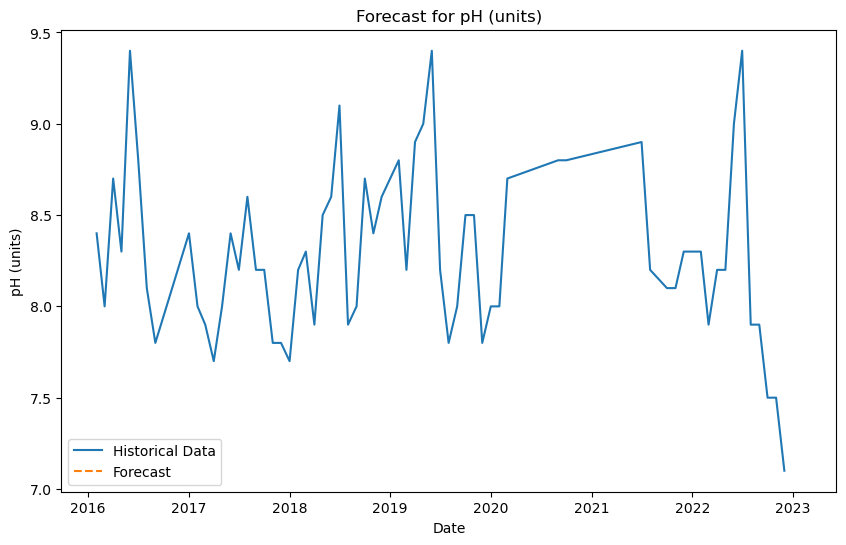

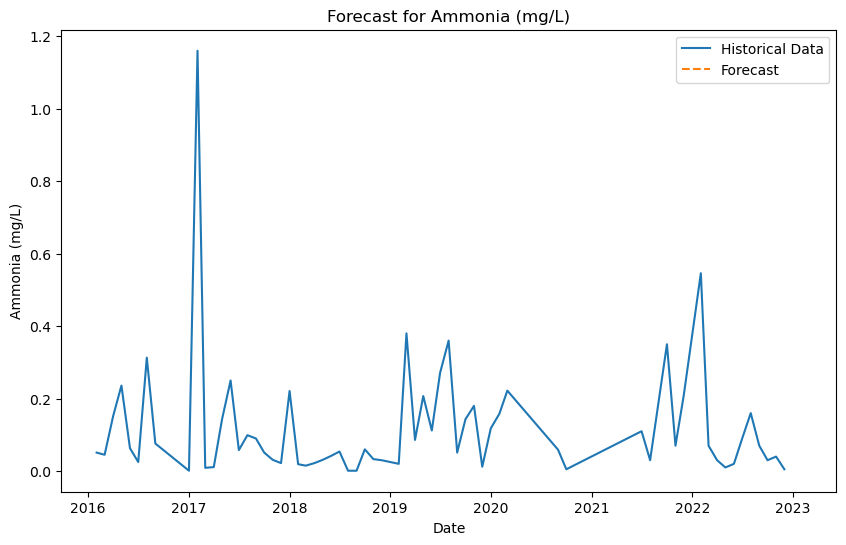

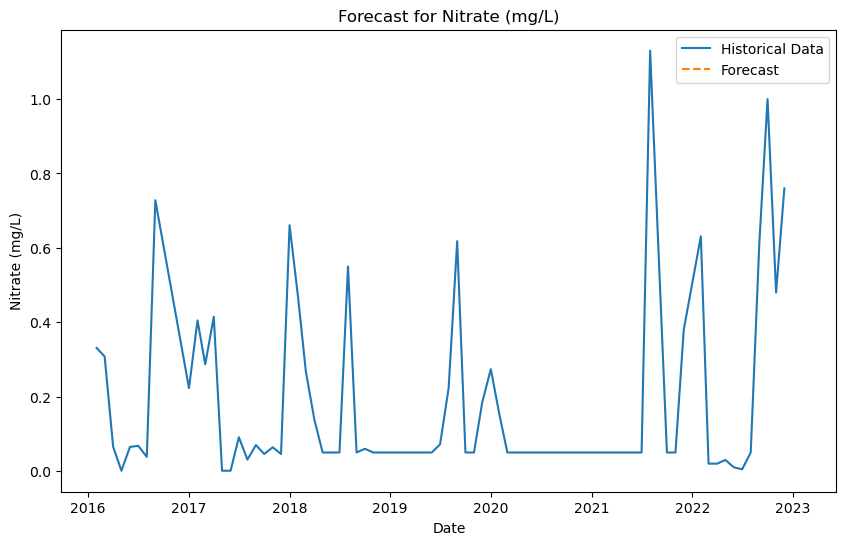

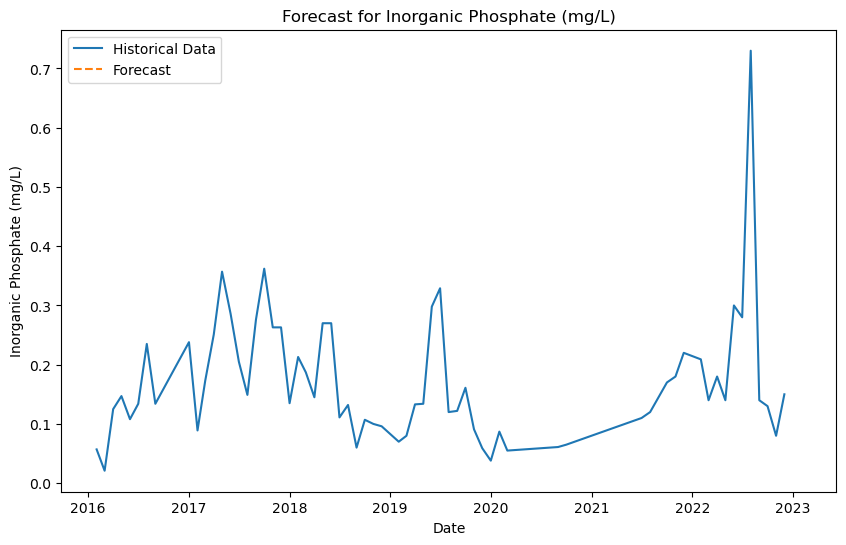

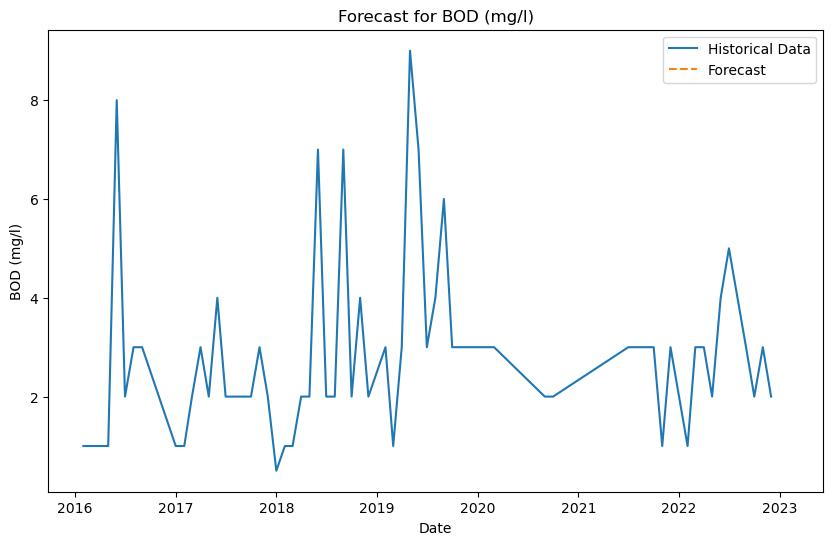

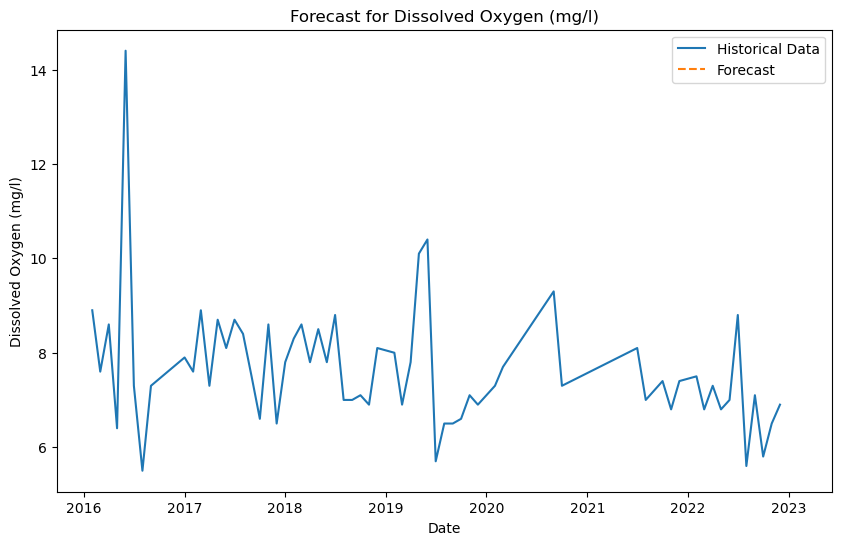

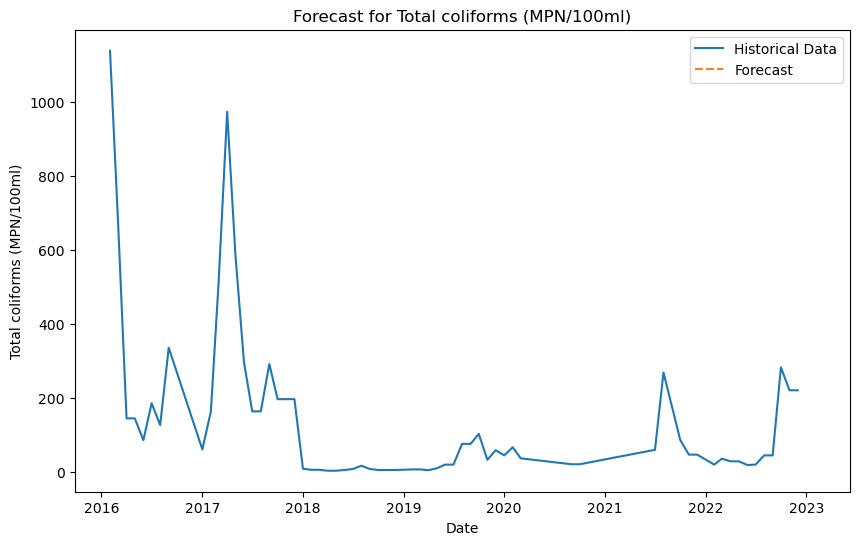

In [40]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load dataset
merged_df = pd.read_csv('New_Merged.csv')

# Drop rows with missing values
merged_df.dropna(inplace=True)

# Ensure there's a Date column for time series forecasting
# Assuming 'Year' and 'Month' columns exist
merged_df['Date'] = pd.to_datetime(merged_df[['Year', 'Month']].assign(DAY=1))
merged_df.set_index('Date', inplace=True)

# Filter data for the specific monitoring station
station_name = 'Stn. I (Central West Bay)'
station_data = merged_df[merged_df['Monitoring Stations'] == station_name]

# Define SARIMA parameters
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Monthly data with yearly seasonality

# Initialize dictionaries for models and forecasts
models = {}
forecasts = {}

# List of parameters to model
parameters = ['pH (units)', 'Ammonia (mg/L)', 'Nitrate (mg/L)', 'Inorganic Phosphate (mg/L)', 'BOD (mg/l)', 'Dissolved Oxygen (mg/l)', 'Total coliforms (MPN/100ml)']

# Fit SARIMA model and make forecasts
for parameter in parameters:
    try:
        # Check if the parameter exists in the filtered data
        if parameter in station_data.columns:
            model = SARIMAX(station_data[parameter], order=sarima_order, seasonal_order=seasonal_order)
            model_fit = model.fit(disp=False)
            forecast = model_fit.get_forecast(steps=1)  # Forecast one step ahead
            forecasts[parameter] = forecast.predicted_mean.iloc[0]  # Extract the scalar forecast value
        else:
            print(f"Parameter '{parameter}' not found in the data for station '{station_name}'.")
    except Exception as e:
        print(f"An error occurred while fitting the model for {parameter}: {e}")

# Create a DataFrame to store the forecast results with parameters as columns
forecast_df = pd.DataFrame([forecasts])

# Add a column for the forecast date
forecast_date = station_data.index[-1] + pd.DateOffset(months=1)
forecast_df['Forecast Date'] = forecast_date

# Print the DataFrame
print(forecast_df)

# Save the DataFrame to a CSV file
forecast_df.to_csv('forecast_results.csv', index=False)



In [15]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load dataset
merged_df = pd.read_csv('New_Merged.csv')

# Drop rows with missing values
merged_df.dropna(inplace=True)

# Ensure there's a Date column for time series forecasting
# Assuming 'Year' and 'Month' columns exist
merged_df['Date'] = pd.to_datetime(merged_df[['Year', 'Month']].assign(DAY=1))
merged_df.set_index('Date', inplace=True)

# Check for duplicate dates
duplicate_dates = merged_df.index[merged_df.index.duplicated()]
print("Duplicate dates found:", duplicate_dates)

# Handle duplicates by aggregating the data (e.g., averaging the values)
merged_df = merged_df.groupby(merged_df.index).mean()

# Set the frequency to 'Month Start'
merged_df = merged_df.asfreq('MS')

# Filter data for the specific monitoring station
station_name = 'Stn. I (Central West Bay)'
station_data = merged_df[merged_df['Monitoring Stations'] == station_name]

# Define SARIMA parameters
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Monthly data with yearly seasonality

# Initialize dictionaries for models and forecasts
models = {}
forecasts = {}

# List of parameters to model
parameters = [
    'pH (units)', 'Ammonia (mg/L)', 'Nitrate (mg/L)', 
    'Inorganic Phosphate (mg/L)', 'BOD (mg/l)', 
    'Dissolved Oxygen (mg/l)', 'Total coliforms (MPN/100ml)'
]

# Fit SARIMA model and make forecasts
for parameter in parameters:
    try:
        # Check if the parameter exists in the filtered data
        if parameter in station_data.columns:
            model = SARIMAX(station_data[parameter], order=sarima_order, seasonal_order=seasonal_order)
            model_fit = model.fit(disp=False)
            forecast = model_fit.get_forecast(steps=1)  # Forecast one step ahead
            forecasts[parameter] = forecast.predicted_mean.iloc[0]  # Extract the scalar forecast value
        else:
            print(f"Parameter '{parameter}' not found in the data for station '{station_name}'.")
    except Exception as e:
        print(f"An error occurred while fitting the model for {parameter}: {e}")

# Create a DataFrame to store the forecast results with parameters as columns
forecast_df = pd.DataFrame([forecasts])

# Add a column for the forecast date
forecast_date = station_data.index[-1] + pd.DateOffset(months=1)
forecast_df['Forecast Date'] = forecast_date

# Print the DataFrame
print(forecast_df)


Duplicate dates found: DatetimeIndex(['2016-02-01', '2016-02-01', '2016-02-01', '2016-02-01',
               '2016-02-01', '2016-02-01', '2016-02-01', '2016-02-01',
               '2016-03-01', '2016-03-01',
               ...
               '2022-12-01', '2022-12-01', '2022-12-01', '2022-12-01',
               '2022-12-01', '2022-12-01', '2022-12-01', '2022-12-01',
               '2022-12-01', '2022-12-01'],
              dtype='datetime64[ns]', name='Date', length=594, freq=None)


TypeError: agg function failed [how->mean,dtype->object]

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings

# WARNINGS
#warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found. Using zeros as starting parameters.")
#warnings.filterwarnings("ignore", message="A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.")
#warnings.filterwarnings("ignore", message="No supported index is available. Prediction results will be given with an integer index beginning at `start`.")
#warnings.filterwarnings("ignore", message="No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.")

# Load dataset
merged_df = pd.read_csv('MICE_Time.csv')

station_name = 'Stn. IV (Central Bay)'
merged_df = merged_df[merged_df['Monitoring Stations'] == station_name]

# Drop rows with missing values
merged_df.dropna(inplace=True)
# Check for any remaining missing values in the dataset
print(merged_df.isnull().sum())

# Ensure there's a Date column for time series forecasting
# Assuming 'Year' and 'Month' columns exist
merged_df['Date'] = pd.to_datetime(merged_df[['Year', 'Month']].assign(DAY=1))
merged_df.set_index('Date', inplace=True)

# Define SARIMA parameters
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Monthly data with yearly seasonality

# Initialize dictionaries for models and forecasts
models = {}
forecasts = {}

# List of parameters to model
parameters = ['pH (units)', 'Ammonia (mg/L)', 'Inorganic Phosphate (mg/L)', 'BOD (mg/l)', 'Total coliforms (MPN/100ml)']

# Fit SARIMA models
for parameter in parameters:
    try:
        model = SARIMAX(merged_df[parameter], order=sarima_order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)
        models[parameter] = model_fit
    except Exception as e:
        print(f"An error occurred while fitting the model for {parameter}: {e}")

# Define the target date for prediction
target_date = pd.Timestamp('2024-01-01')

# Calculate number of periods from the last observed date to the target date
last_date = merged_df.index[-1]
forecast_steps = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

# Forecast for the target date
forecast_results = {}
for parameter in parameters:
    try:
        model_fit = models[parameter]
        forecast = model_fit.get_forecast(steps=forecast_steps).predicted_mean
        forecast_value = forecast.values[-1]  # Value for the target date
        forecast_results[parameter] = forecast_value
    except Exception as e:
        print(f"An error occurred while forecasting for {parameter}: {e}")

# Convert the results to a DataFrame with parameters as columns only
forecast_df = pd.DataFrame([forecast_results])

print("Forecasted Values:")
print(forecast_df)

# Optionally, save the results to a CSV file
# forecast_df.to_csv('forecast_results.csv', index=False)






Monitoring Stations            0
Month                          0
Year                           0
Date                           0
pH (units)                     0
Ammonia (mg/L)                 0
Inorganic Phosphate (mg/L)     0
BOD (mg/l)                     0
Total coliforms (MPN/100ml)    0
Phytoplankton (cells/ml)       0
dtype: int64


E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodel

Forecasted Values:
   pH (units)  Ammonia (mg/L)  Inorganic Phosphate (mg/L)  BOD (mg/l)  \
0     8.35863        0.032831                    0.206474    1.742235   

   Total coliforms (MPN/100ml)  
0                   101.864736  


E:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No

In [12]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Ignore warnings for simplicity
#warnings.filterwarnings("ignore")

# Load dataset
file_path = 'MICE_Time.csv'  # Path to your file
df = pd.read_csv(file_path)

# Ensure the 'Date' column is in a valid DateTime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# List of parameters to model
parameters = ['pH (units)', 'Ammonia (mg/L)', 'Inorganic Phosphate (mg/L)', 'BOD (mg/l)', 'Total coliforms (MPN/100ml)']

# Define SARIMA parameters
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Monthly seasonality

# Monitoring stations list
stations = df['Monitoring Stations'].unique()

# Initialize dictionaries for models and forecasts
models = {}
forecasts = {}

# Target forecast date
target_date = pd.Timestamp('2024-12-10')

# Loop over each monitoring station and parameter
for station in stations:
    station_df = df[df['Monitoring Stations'] == station]
    
    forecasts[station] = {}
    
    for parameter in parameters:
        try:
            # Fit SARIMA model
            model = SARIMAX(station_df[parameter], order=sarima_order, seasonal_order=seasonal_order)
            model_fit = model.fit(disp=False)
            models[(station, parameter)] = model_fit
            
            # Calculate steps for forecast
            last_date = station_df.index[-1]
            forecast_steps = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)
            
            # Forecast for the target date
            forecast = model_fit.get_forecast(steps=forecast_steps).predicted_mean
            forecast_value = forecast.values[-1]  # Get forecast value for the target date
            forecasts[station][parameter] = forecast_value
            
        except Exception as e:
            print(f"An error occurred while processing {station} for {parameter}: {e}")

# Convert forecast results into a DataFrame for easy viewing
forecast_df = pd.DataFrame(forecasts).T

print("Forecasted Values for each station on 10-12-2024:")
print(forecast_df)

# Optionally, save the forecasted values to a CSV
forecast_df.to_csv('forecast_results.csv')


Forecasted Values for each station on 10-12-2024:
                           pH (units)  Ammonia (mg/L)  \
Stn. I (Central West Bay)    7.745322        0.057708   
Stn II (East Bay)            8.203216        0.103662   
Stn. IV (Central Bay)        8.330709        0.028528   
Stn V (Northern West Bay)    8.363922       -0.014832   
Stn VIII (South Bay)         8.258480        0.023098   
Stn XV (San Pedro)           8.192997        0.020837   
Stn.XVI (Sta Rosa)           7.866598        0.015051   
Stn XVII (Sanctuary)         8.376888        0.022621   
Stn XVIII (Pagsanjan)        7.738305        0.031105   
Stn.XV (Sta Rosa)           35.600013        0.008000   
Stn XIII (Taytay)            8.824923        0.026190   
Stn XIX (Muntinlupa)         8.953933       -0.011880   
Stn XX (GEMS)                7.786996        0.049359   
Stn XXI (Cardona)            7.931951        0.074981   
Stn XXII (Jala-jala)         7.868341        0.059342   
Stn XXIII (Lumban)           6.722134 